# Project: ML - K-means clustering (Senator Votes and NBA players)

<br>

## Questions to address:
- Find clusters in Senator Votes and NBA players

<br>

## Tools:
- Models:
  - K-means clustering

<br>

### load defaults

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import requests 
import math

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import display, Math

from functions import *

plt.style.use('seaborn')
plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))


#specific to this project
from sklearn.cluster import KMeans

print("Defaults Loaded")

Defaults Loaded


<br>

## K-means clustering, 2 clusters

<br>

## Dataset: congress votes

In [2]:
votes = pd.read_csv('./data/114_congress.csv')
display(votes[:3])

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [3]:
print(votes['party'].value_counts())

R    54
D    44
I     2
Name: party, dtype: int64


In [4]:
#fit transform returns in the eucledian distance from each Senator to the first cluster and second clusters 

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])

#get clustering labels from model
labels = kmeans_model.labels_
#compare model with original data
display(pd.crosstab(labels,votes['party']))

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


some democrats voted along side the Republicans in some votes, identify the outliers:

In [5]:
democratic_outliers = votes[(labels==1) & (votes['party']=='D')]
sel = votes['party']=='D'
print("Average vote from Democrats in first votes:")
print(votes[sel].iloc[:,:9].mean())
print(democratic_outliers.iloc[:,:9])

Average vote from Democrats in first votes:
00001    0.704545
00004    0.079545
00005    0.011364
00006    0.988636
00007    0.011364
00008    0.875000
dtype: float64
        name party state  00001  00004  00005  00006  00007  00008
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5


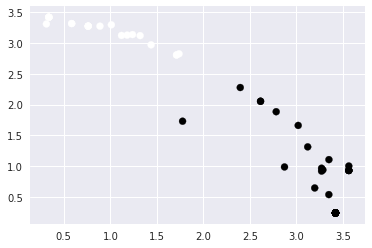

In [6]:
plt.scatter(senator_distances[:,0],senator_distances[:,1],c=labels)
plt.show()

find rows further away from other cluster:

In [7]:
extremism = np.sum(senator_distances**3, axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism', ascending = False, inplace=True)
print(votes.iloc[:10,[0,1,2,3,4,5,6,7,8,-1]])

         name party state  00001  00004  00005  00006  00007  00008  extremism
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0  46.250476
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0  46.046873
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0  46.046873
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0  46.046873
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0  46.046873
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0  40.017540
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0  40.017540
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0  40.017540
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0  40.017540
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0  40.017540


<br>

## K-means Clustering

<br>

## Dataset: NBA stats on players

In [8]:
nba = pd.read_csv("./data/nba_2013.csv")
display(nba.iloc[:3,:20])

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639


point guards are crucial because they create scoring opportunities, lets look at what types of point guards exist and group similar point guards together
- look at points per game
- $ATR = \frac{Assists}{Turnovers}$

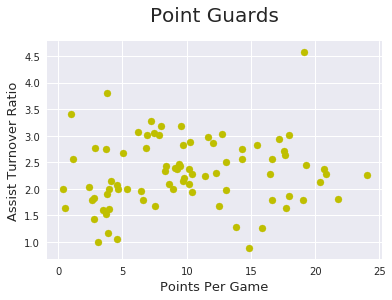

In [9]:
point_guards = nba[nba['pos']=='PG'].copy()

#ppg
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

#drop players with no turnovers
point_guards = point_guards.loc[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast']/point_guards['tov']

plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

plt.show()

maybe 5 clusters (definitely 3)

In [14]:
num_clusters = 5

In [15]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

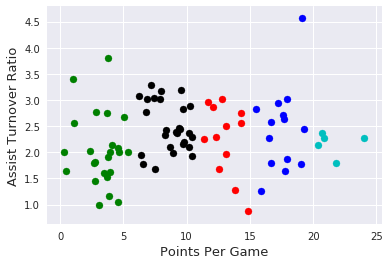

In [16]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)